In [ ]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
#nltk.download('punkt')       # only need to run this once
#nltk.download('stopwords')   # only need to run this once
#nltk.download('wordnet')     # only need to run this once
#nltk.download('omw-1.4')     # only need to run this once
lang="english"

stop_words=set(stopwords.words("english"))

In [86]:

# functions for cleaning
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

def process_raw_text(text):    
    # Tokenize words
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase, lemmatize and remove stopwords
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens]
    lemmas = [token.lower() for token in lemmas]    
    
    clean = [lemma for lemma in lemmas if lemma not in stop_words]
    return clean

def frequent_ngram(corpus, ngram, n=30):    
    # Preprocess each document
    documents = [process_raw_text(document) for document in corpus]
    
    # Find ngrams per document and put into one long list
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    n_grams_flat = [item for sublist in n_grams for item in sublist]
    
    # get frequencies of ngrams
    freq_dist = FreqDist(n_grams_flat)
    top_freq = freq_dist.most_common(n)
    theDF = pd.DataFrame(top_freq, columns=["ngram", "count"])     

    tmp = theDF
    tmp['ngram'] = tmp['ngram'].astype('string')
    tmp['ngram']=tmp['ngram'].apply(lambda x : search_words(x))

    return tmp


In [ ]:
oz_reviews = pd.read_csv('../data/ozempic.csv')
we_reviews = pd.read_csv('../data/wegovy.csv')

In [ ]:
oz_unigrams=frequent_ngram(oz_reviews['review_text'],1,30)
we_unigrams=frequent_ngram(we_reviews['review_text'],1,30)

oz_bigrams=frequent_ngram(oz_reviews['review_text'],2,30)
we_bigrams=frequent_ngram(we_reviews['review_text'],2,30)



In [91]:
maxWord = 5000
oz_unigramsBig=frequent_ngram(oz_reviews['review_text'],1,maxWord)
we_unigramsBig=frequent_ngram(we_reviews['review_text'],1,maxWord)

oz_bigramsBig=frequent_ngram(oz_reviews['review_text'],2,maxWord)
we_bigramsBig=frequent_ngram(we_reviews['review_text'],2,maxWord)


In [92]:
nTotal = oz_unigramsBig['count'].sum()
oz_unigramsBig['share'] = oz_unigramsBig['count']/nTotal

nTotal = we_unigramsBig['count'].sum()
we_unigramsBig['share'] = we_unigramsBig['count']/nTotal

nTotal = oz_bigramsBig['count'].sum()
oz_bigramsBig['share'] = oz_bigramsBig['count']/nTotal

nTotal = we_bigramsBig['count'].sum()
we_bigramsBig['share'] = we_bigramsBig['count']/nTotal



In [95]:
print(oz_unigramsBig[oz_unigramsBig['ngram'] == 'nausea'])
print(we_unigramsBig[we_unigramsBig['ngram'] == 'nausea'])

print(oz_unigramsBig[oz_unigramsBig['ngram'] == 'diarrhea'])
print(we_unigramsBig[we_unigramsBig['ngram'] == 'diarrhea'])

     ngram  count     share
15  nausea    149  0.007316
     ngram  count     share
13  nausea    204  0.009273
       ngram  count     share
35  diarrhea     86  0.004223
       ngram  count     share
79  diarrhea     53  0.002409


In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x="count", y="ngram", data=oz_unigrams)
plt.title("Most common unigrams")

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x="count", y="ngram", data=we_unigrams)
plt.title("Most common unigrams")

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Most common bigrams')

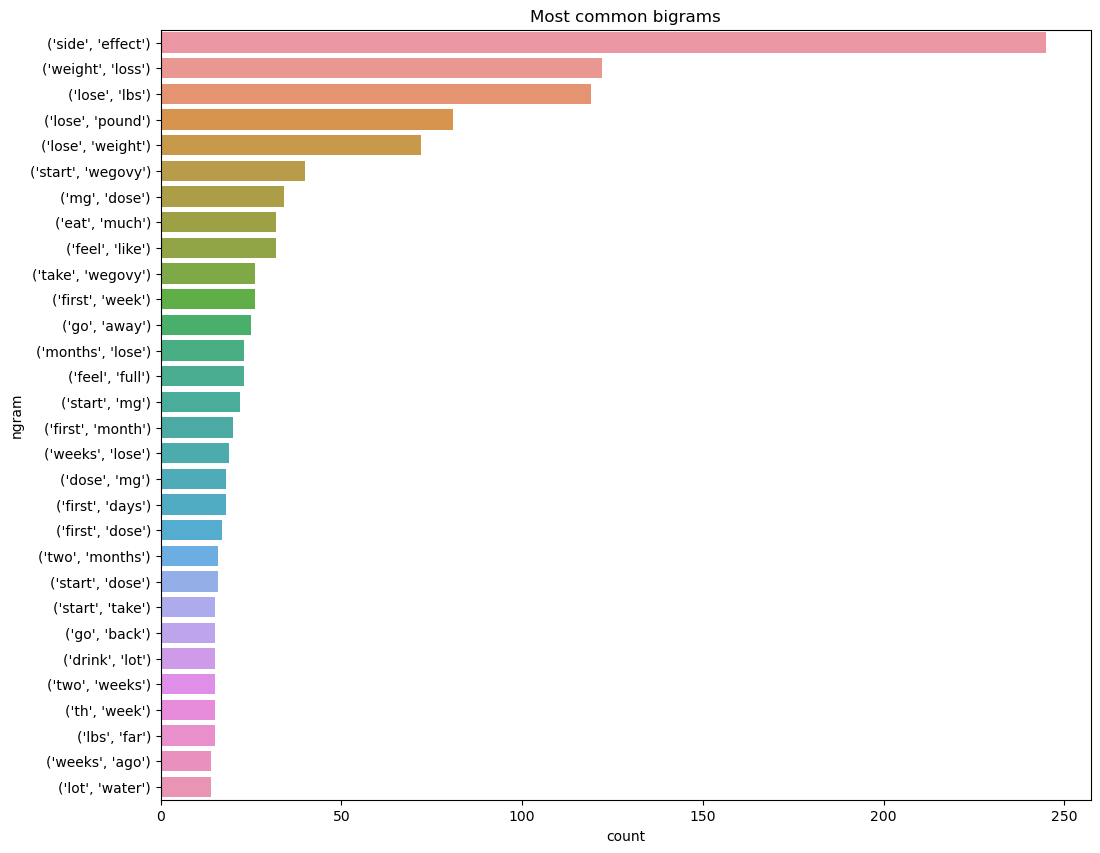

In [93]:
plt.figure(figsize=(12,10))
sns.barplot(x="count", y="ngram", data=we_bigrams)
plt.title("Most common bigrams")